In [1]:
import utils

from typing import Callable
from pprint import pprint
# all additional modules are listed in requirements.txt
import numpy as np
import sympy as sp
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib widget needs ipyml, remove if you don't have it
%matplotlib widget
sp.__version__, np.__version__, matplotlib.__version__

('1.12', '1.24.3', '3.7.2')

## Equation
Variant 12.4.g: $(x-3) \cdot \cos{x} - 1=0$

In [12]:
plt.close()

def prep_ax(title='', xscale='linear', yscale='linear'):
    # yscale, xscale also 'log'
    fig, ax = plt.subplots(figsize=(8,5))
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    ax.minorticks_on()
    ax.grid(True)
    ax.grid(True, 'minor', ls=':')
    ax.set_xlabel('iteration')
    ax.set_ylabel('residual')
    ax.set_title(title)
    return fig, ax

'-(x - 3)*sin(x) + cos(x)'

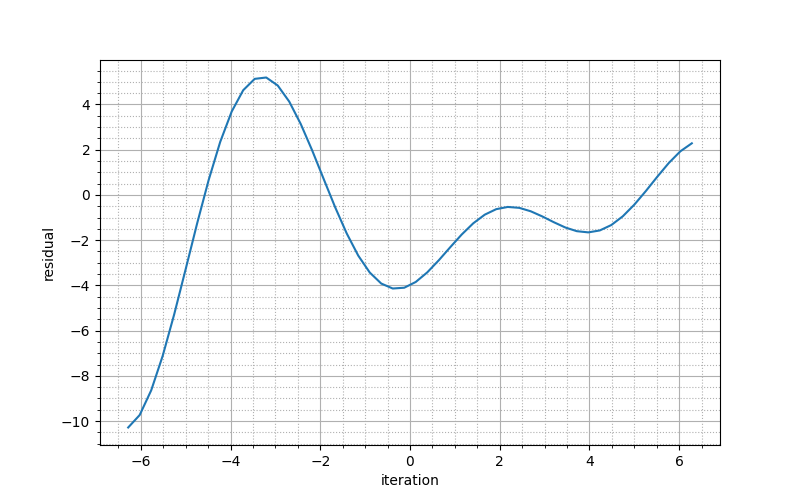

In [8]:
x = sp.symbols('x', reals=True)
f = (x-3)*sp.cos(x)-1
df = sp.diff(sp.acos(1/(x-3)), x)
xvals = np.linspace(-2*np.pi, 2*np.pi)
fig, ax = prep_ax()
ax.plot(xvals, sp.lambdify(x, f, 'numpy')(xvals))
str(f.diff(x))

$\Rightarrow$ $x_1 \approx -4.58$, $x_2 \approx 5.18$

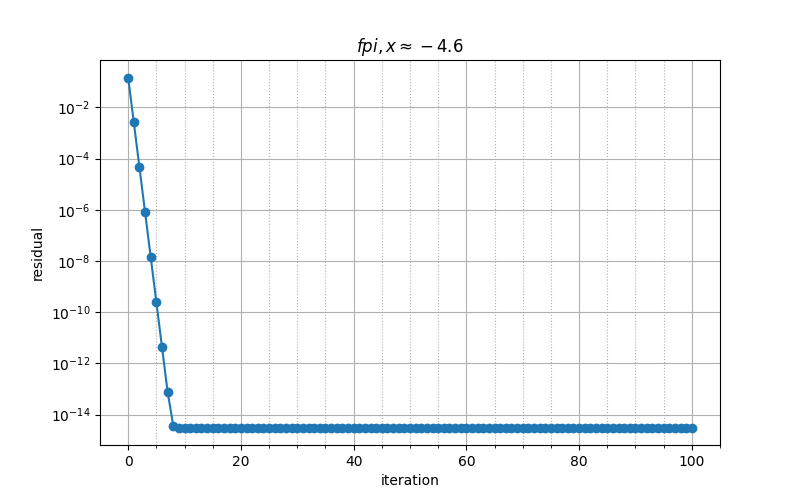

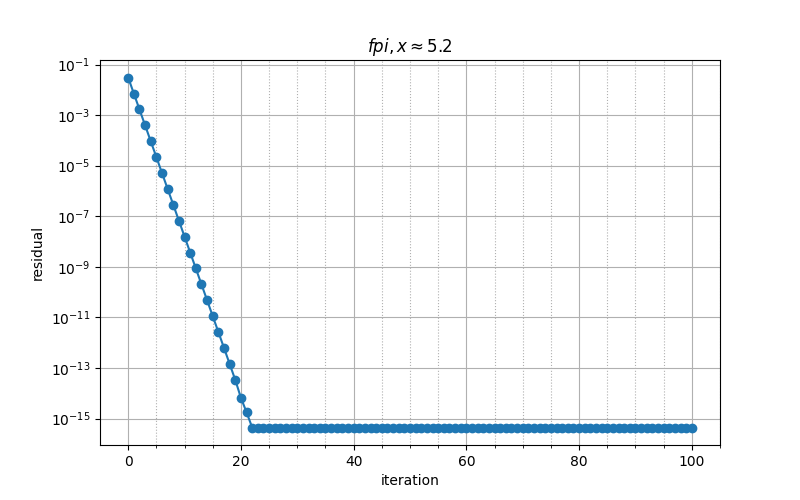

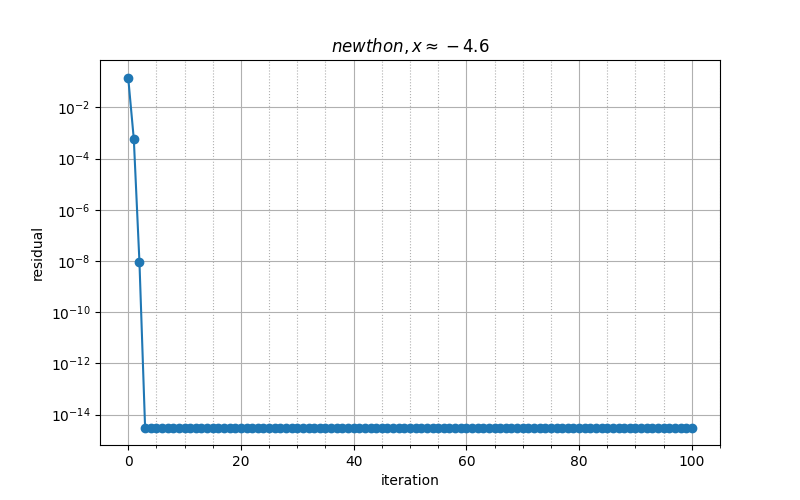

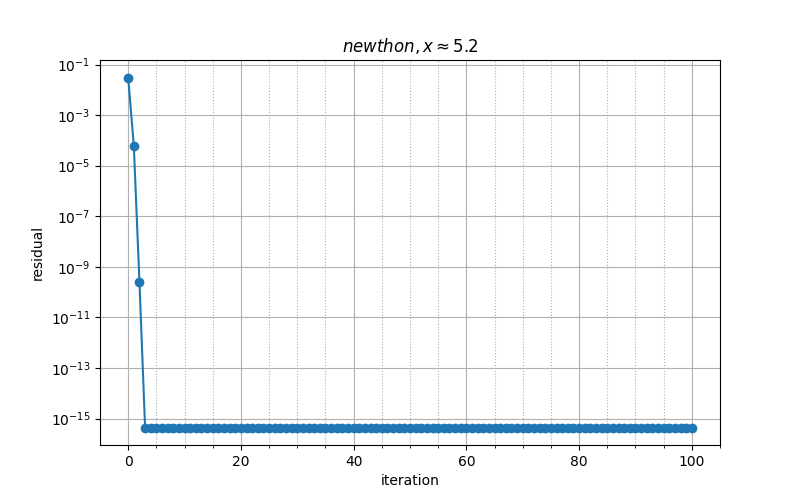

In [11]:
f = lambda x: (x-3)*np.cos(x)-1
eq_fpi_step_46 = lambda x: -2*np.pi+np.arccos(1/(x-3)) # for value x around -4.6
eq_fpi_step_52 = lambda x: 2*np.pi-np.arccos(1/(x-3)) # for value x around 5.2
eq_newthon_step = lambda x: x - ((x-3)*np.cos(x)-1) / (-(x - 3)*np.sin(x) + np.cos(x))

def run_iter_ne(f: Callable, iteration: Callable, x=.0, iterations=100):
    xs = [x]
    for i in range(iterations):
        x = iteration(x)
        xs.append(x)
    return xs

def plot_res_ne(f: Callable, res, title=''):
    fig, ax = prep_ax(title, yscale='log')
    ax.plot([abs(f(i)) for i in res], '-o')

res = run_iter_ne(f, eq_fpi_step_46, -4.6)
plot_res_ne(f, res, '$fpi, x \\approx -4.6$')
res = run_iter_ne(f, eq_fpi_step_52, 5.2)
plot_res_ne(f, res, '$fpi, x \\approx 5.2$')

res = run_iter_ne(f, eq_newthon_step, -4.6)
plot_res_ne(f, res, '$newthon, x \\approx -4.6$')
res = run_iter_ne(f, eq_newthon_step, 5.2)
plot_res_ne(f, res, '$newthon, x \\approx 5.2$')

## System of equations
Variant IV.12.5(в)

$\cos{(x-1)} + y = 0.5 \Rightarrow y = 0.5 - \cos{(x-1)}$

$x - \cos{y} = 3 \Rightarrow x = 3 - \cos{y}$

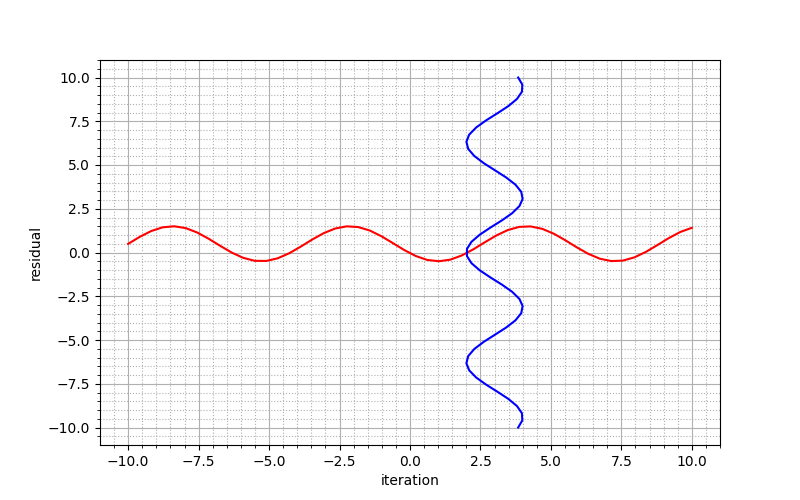

In [16]:
fig, ax = prep_ax()
x = np.linspace(-10, 10)
ax.plot(x, 0.5 - np.cos(x-1), color='r')
ax.plot(3-np.cos(x), x, color='b')

$\Rightarrow x \approx 2, y \approx 0$

In [30]:
for i in range(100):
    plt.close()

In [47]:
isinstance(sp.cos(sp.symbols('x')), sp.core.expr.Expr)

True

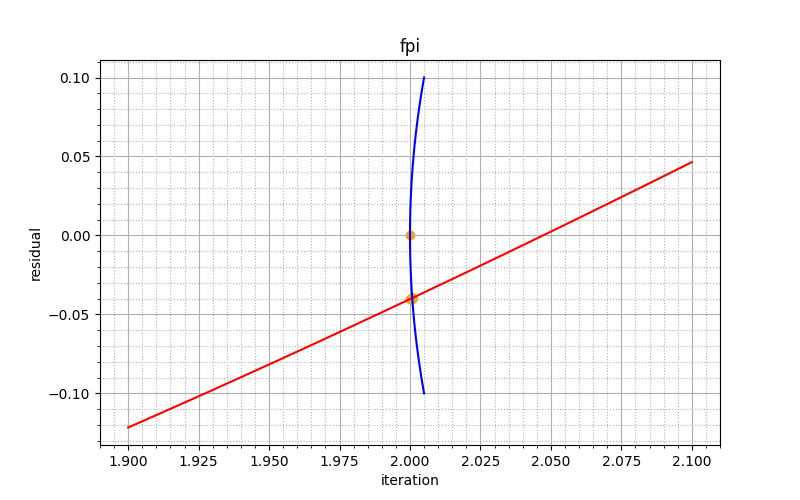

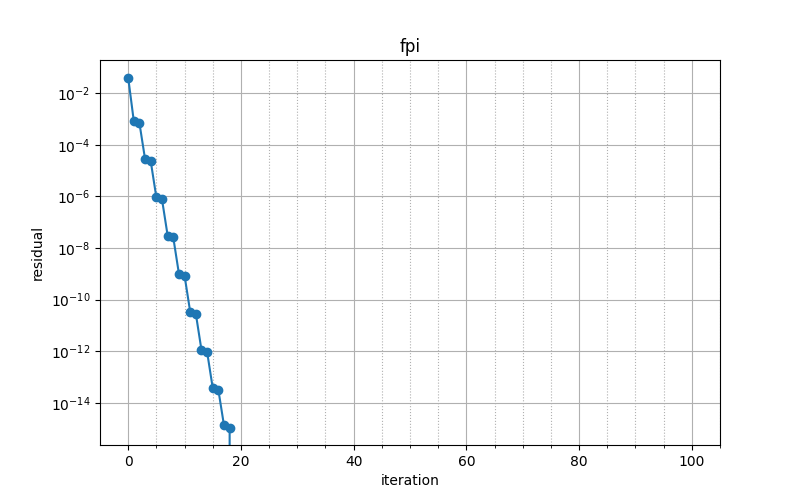

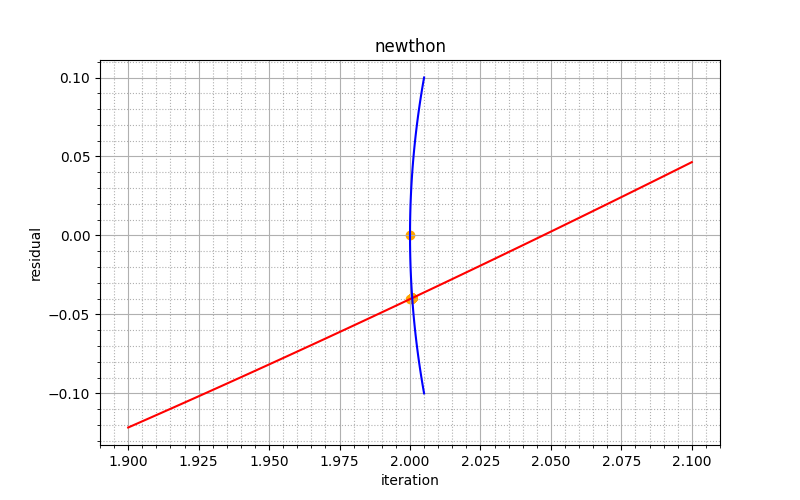

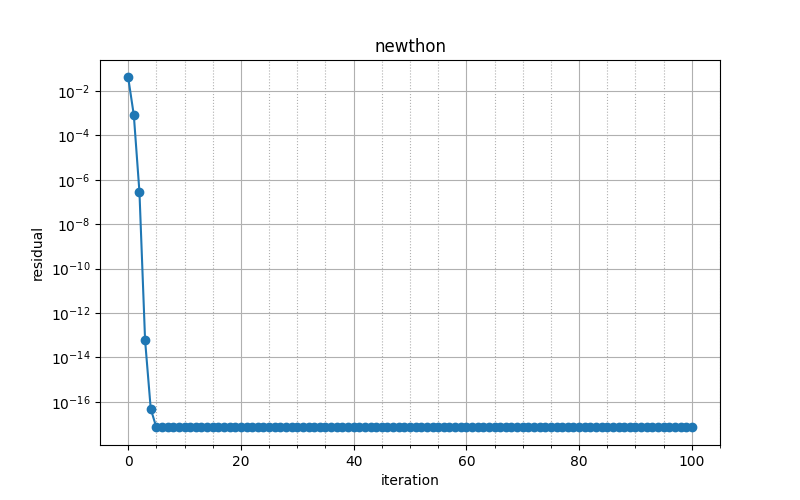

In [56]:
def f(x):
    x, y = x
    return np.array([3 - np.cos(y) - x, 0.5 - np.cos(x-1) - y])

def fpi_iter(x):
    x, y = x
    return 3 - np.cos(y), 0.5 - np.cos(x-1)

def create_newthon_iter(f, vars):
    j = [[sp.lambdify(vars, fi.diff(xi), 'numpy') for xi in vars] for fi in f]
    f_call = [sp.lambdify(vars, fi, 'numpy') for fi in f]
    def newthon_iter(x):
        x = np.array(x)
        ji = [[cell(*x) for cell in row] for row in j]
        dx = utils.solve_gauss(np.array(ji), np.array([-fi(*x) for fi in f_call]))
        return x + dx
    return newthon_iter

def run_iter_sne(iteration: Callable, x=[.0,.0], iterations=100):
    xs = [x]
    for i in range(iterations):
        x = iteration(x)
        xs.append(x)
    return xs

def plot_conv_iter(xs, title=''):
    fig, ax = prep_ax(title)
    x = np.linspace(1.9, 2.1)
    y = np.linspace(-0.1, 0.1)
    ax.plot(x, 0.5 - np.cos(x-1), color='r')
    ax.plot(3-np.cos(y), y, color='b')
    ax.scatter(xs[:, 0], xs[:,1], color='orange')

def plot_res_sne(f: Callable, res, title='', yscale='log'):
    fig, ax = prep_ax(title, yscale=yscale)
    ax.plot([sum(f(i)**2)**0.5 for i in res], '-o')

xs = np.array(run_iter_sne(fpi_iter, [2, 0]))
plot_conv_iter(xs, 'fpi')
plot_res_sne(f, xs, 'fpi')

x_sym, y_sym = sp.symbols('x y')
sp_f = [3 - sp.cos(y_sym) - x_sym, 0.5 - sp.cos(x_sym-1) - y_sym]

xs = np.array(run_iter_sne(create_newthon_iter(sp_f, [x_sym, y_sym]), [2, 0]))
plot_conv_iter(xs, 'newthon')
plot_res_sne(f, xs, 'newthon')